In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt


In [2]:
insurance = pd.read_csv("insurance.csv")
#Explicando as colunas
#Age = Idade do contratante
#Sexo = gênero do contratante
#BMI = índice de massa corporal
#Children = Quantidade de crianças cobertas pelo seguro
#Smoker = Se fuma ou não
#Charges = Custo médico individual pelo seguro de saúde

In [3]:
#Arredondando coluna de Charges para 2 casas decimais e de BMI para 1 casa decimal
insurance['charges'] = insurance['charges'].round(2)
insurance['bmi'] = insurance['bmi'].round(1)

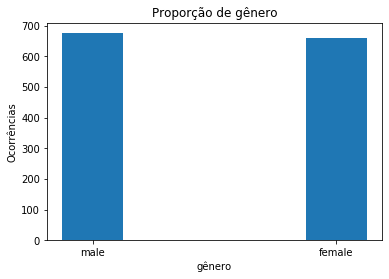

In [4]:
#Plotando a proporção de gênero

gênero = ["male","female"]
label_sexo = insurance.sex.value_counts()
plt.bar(gênero, label_sexo, width = 0.25)
plt.title("Proporção de gênero")
plt.xlabel("gênero")
plt.ylabel("Ocorrências")
plt.show()

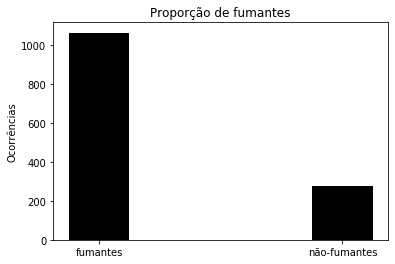

In [5]:
#Plotando quantidade de fumantes
fumantes = ["fumantes", "não-fumantes"]
qtd_fumantes = insurance.smoker.value_counts()
plt.bar(fumantes, qtd_fumantes, width = 0.25, color = 'black')
plt.title("Proporção de fumantes")
plt.ylabel("Ocorrências")

plt.show()

In [6]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

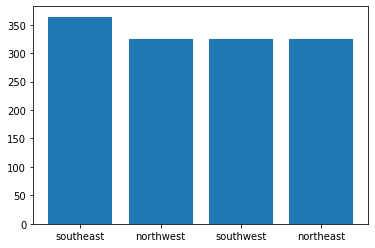

In [7]:
#Quantidade de pessoas por região
regiao = ['southeast', 'northwest','southwest', 'northeast']
quantidade = insurance.region.value_counts()
plt.bar(regiao, quantidade)
plt.show()

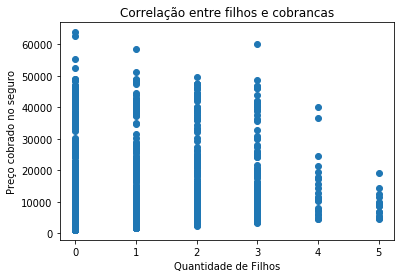

In [8]:
#Verificando a correlação de filhos com cobranças

filhos = insurance["children"]
cobranca = insurance["charges"]
plt.scatter(filhos, cobranca)
plt.title("Correlação entre filhos e cobrancas")
plt.xlabel("Quantidade de Filhos")
plt.ylabel("Preço cobrado no seguro")
plt.show()

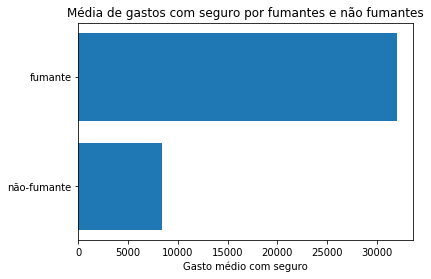

In [9]:
#Plotando o gasto médio com saúde para fumantes e não fumantes

fumam = insurance.groupby("smoker")["charges"].mean()
possibilidades=["não-fumante","fumante"]
plt.barh(possibilidades,fumam)
plt.title("Média de gastos com seguro por fumantes e não fumantes")
plt.xlabel("Gasto médio com seguro")
plt.show()


In [10]:
insurance.groupby("smoker")["smoker"].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

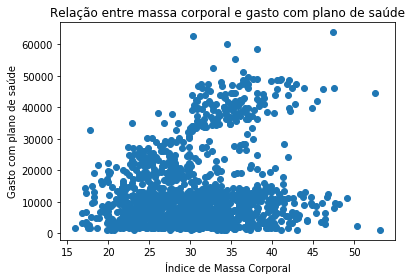

In [11]:
#Procurando correlação entre BMI e Charges

indice_mass=insurance["bmi"]
gasto = insurance["charges"]
plt.scatter(indice_mass, gasto)
plt.xlabel("Índice de Massa Corporal")
plt.ylabel('Gasto com plano de saúde')
plt.title("Relação entre massa corporal e gasto com plano de saúde")
plt.show()

## Existe uma aparente correlação positiva entre os dados


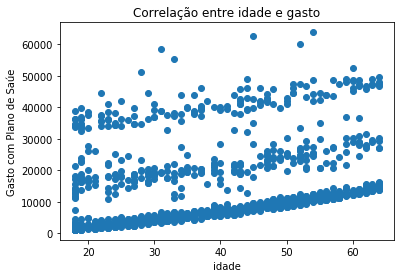

In [12]:
#Buscando correlação entre idade e gasto com plano de saúde 

idade = insurance["age"]
gasto = insurance["charges"]
plt.scatter(idade, gasto)
plt.title("Correlação entre idade e gasto")
plt.xlabel("idade")
plt.ylabel("Gasto com Plano de Saúe")
plt.show()


## Podemos perceber uma clara correlação positiva




## -----------------------------------------------------------------------------------


## Tentando descobrir se existe alguma relação entre determinada região ter muitos fumantes e essa mesma região ter mais gasto com seguro de saúde

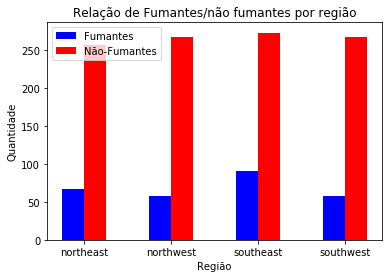

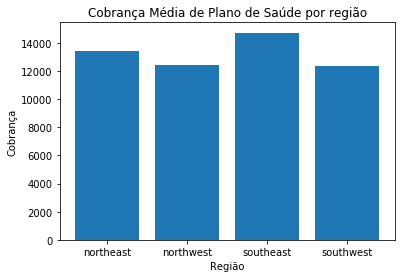

In [13]:
fumantes_por_regiao = insurance.groupby(["region"])["smoker"].value_counts()

x1 = np.arange(len(insurance.groupby(["region"]).count()))
x2 = [x + 0.25 for x in x1]

df = pd.DataFrame(fumantes_por_regiao)
df_nao_fumante =df.drop(index = 'yes',level = 1)
df_fumantes = df.drop(index = 'no', level = 1)

regiao = ["northeast", "northwest", "southeast", "southwest"]


plt.bar(x1, df_fumantes["smoker"], width = 0.25, label = "Fumantes", color = 'b' )
plt.bar(x2, df_nao_fumante["smoker"], width = 0.25, label = "Não-Fumantes", color = 'r')

plt.title("Relação de Fumantes/não fumantes por região")
plt.xlabel("Região")
plt.ylabel("Quantidade")

plt.xticks([x - 0.125 for x in x2],regiao)
plt.legend(loc = 0)
plt.show()

cobranca_por_regiao = insurance.groupby(["region"])["charges"].mean().round(2)

regiao = ["northeast", "northwest", "southeast", "southwest"]

plt.bar(regiao, cobranca_por_regiao)
plt.title("Cobrança Média de Plano de Saúde por região")
plt.ylabel("Cobrança")
plt.xlabel("Região")
plt.show()

In [14]:
df_fumantes

,,smoker
region,smoker,
northeast,yes,67
northwest,yes,58
southeast,yes,91
southwest,yes,58


## Não parece haver relação direta entre a quantidade de fumantes e o preço cobrado no Plano de Saúde. 
## A distribuição de fumantes por região é muito homogênea e isso prejudica a análise

## -----------------------------------------------------------------------------------------

## Descobrindo qual região tem mais filhos


In [15]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.8,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.94


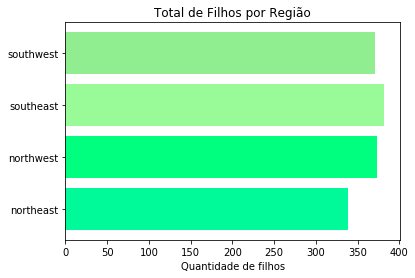

In [16]:
total_filhos_por_regiao = insurance.groupby(["region"])["children"].sum()

region = ["northeast", "northwest", "southeast", "southwest"]

plt.barh(region, total_filhos_por_regiao, color = ['#00FA9A','#00FF7F','#98FB98', '#90EE90'])
plt.title("Total de Filhos por Região")
plt.xlabel("Quantidade de filhos")
plt.yticks(rotation = 0)
plt.show()

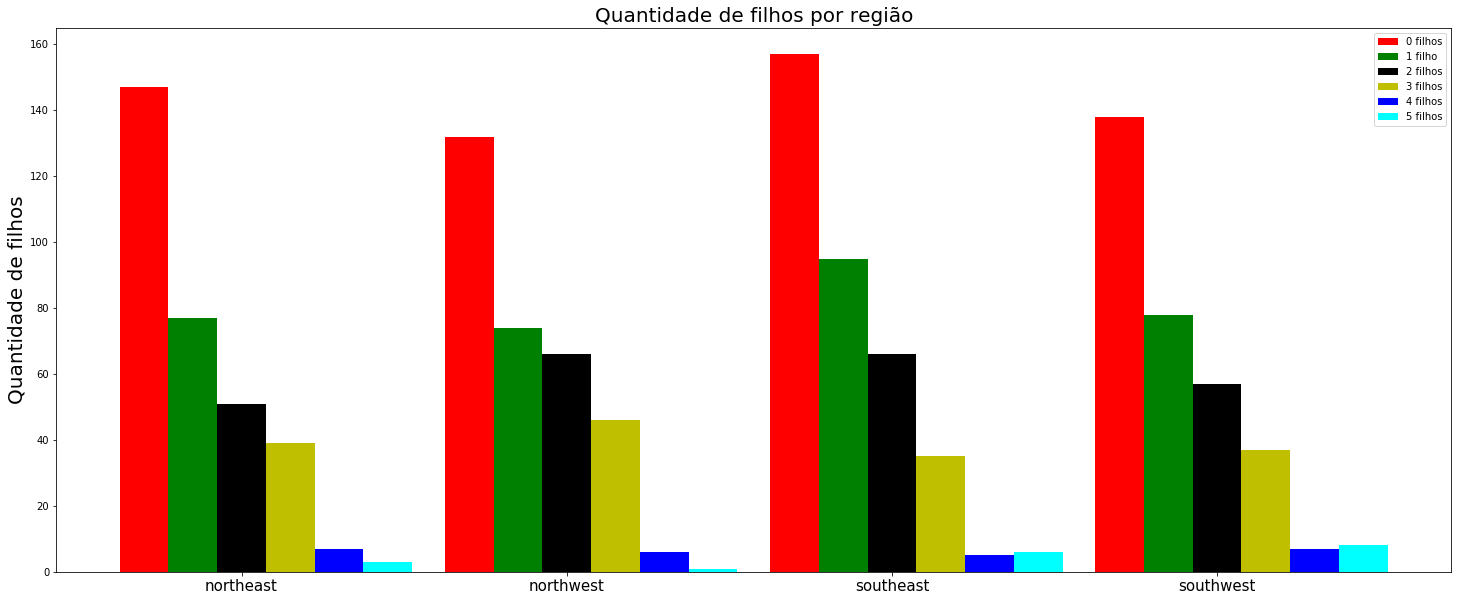

In [17]:
filhos_por_regiao = insurance.groupby(["region"])["children"].value_counts()

figure = plt.subplots(figsize=(25,10))

x1 = np.arange(len(insurance.groupby(["region"]).count()))
x2 = [x + 0.15 for x in x1]
x3 = [x + 0.15 for x in x2]
x4 = [x + 0.15 for x in x3]
x5 = [x + 0.15 for x in x4]
x6 = [x + 0.15 for x in x5]

filhos = pd.DataFrame(filhos_por_regiao)
filhos_0 = filhos.drop(index = [1,2,3,4,5], level = 1)
filhos_1 = filhos.drop(index = [0,2,3,4,5], level = 1)
filhos_2 = filhos.drop(index = [0,1,3,4,5], level = 1)
filhos_3 = filhos.drop(index = [0,1,2,4,5], level = 1)
filhos_4 = filhos.drop(index = [0,1,2,3,5], level = 1)
filhos_5 = filhos.drop(index = [0,1,2,3,4], level = 1)

plt.bar(x1, filhos_0["children"], width = 0.15, label = "0 filhos", color = 'r')
plt.bar(x2, filhos_1["children"], width = 0.15, label = "1 filho", color = 'g')
plt.bar(x3, filhos_2["children"], width = 0.15, label = "2 filhos", color = 'black')
plt.bar(x4, filhos_3["children"], width = 0.15, label = "3 filhos", color = 'y')
plt.bar(x5, filhos_4["children"], width = 0.15, label = "4 filhos", color = 'b')
plt.bar(x6, filhos_5["children"], width = 0.15, label = "5 filhos", color = 'cyan')

plt.title("Quantidade de filhos por região", fontsize = 20)
plt.ylabel("Quantidade de filhos", fontsize = 20)


plt.xticks([x  for x in x3],regiao, fontsize = 15)
plt.legend()
plt.show()





## ----------------------------------------------------------------------------------


In [118]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.8,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.94
